# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Compute shape
df.shape

(1898, 9)

***italicized text***#### Observations: There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are no missing values. The datatypes include int, float, and object.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Compute missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#Find statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: The minimum food prep time is 20 minutes. The average is 27.37 minutes. The max time is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# I decided to use value_counts to find out how many orders are not rated.
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Finding number of unique values in this column
df['order_id'].nunique()

1898

In [ ]:
# Finding number of unique values in this column
df['customer_id'].nunique()

1200

In [ ]:
# Finding number of unique values in this column
df['restaurant_name'].nunique()

178

In [ ]:
# Finding number of unique values in this column
df['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

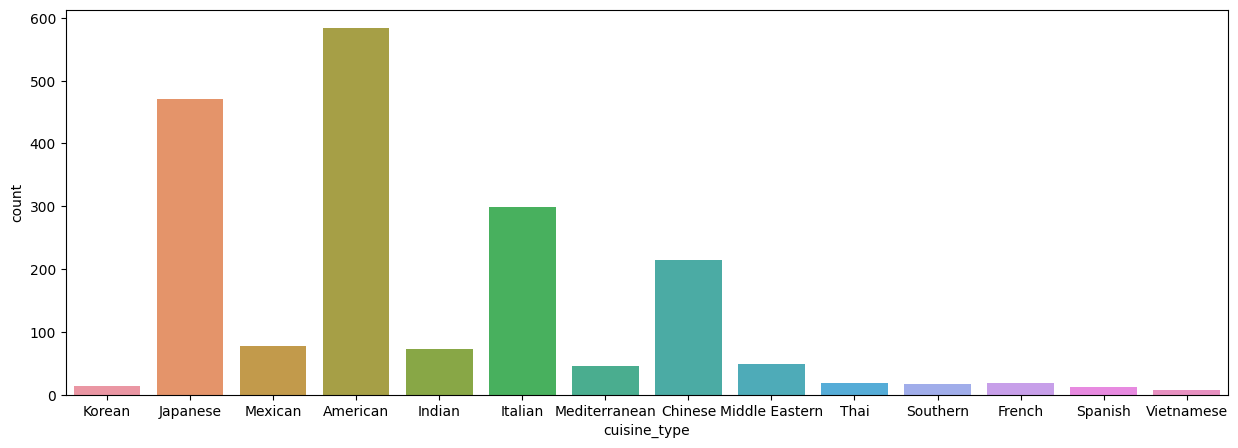

In [ ]:
#Plotting cuisine type
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

# We find out there are 14 cuisine types.

Observation: We can see that out of 14 cuisines, Japanese, American, Italian, and Chinese are quite popular.

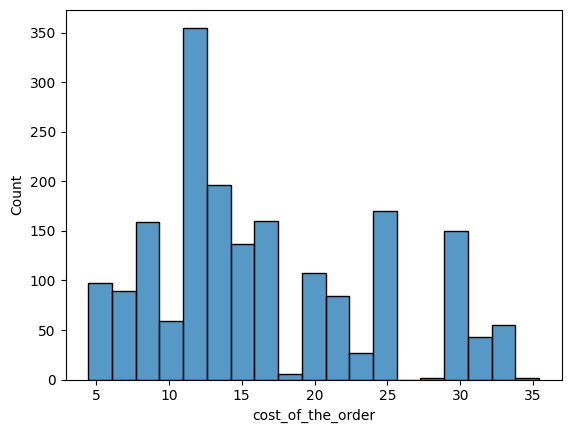

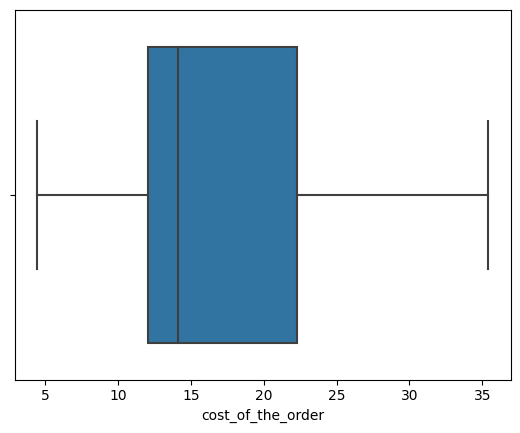

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

In [ ]:
df['day_of_the_week'].nunique()

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

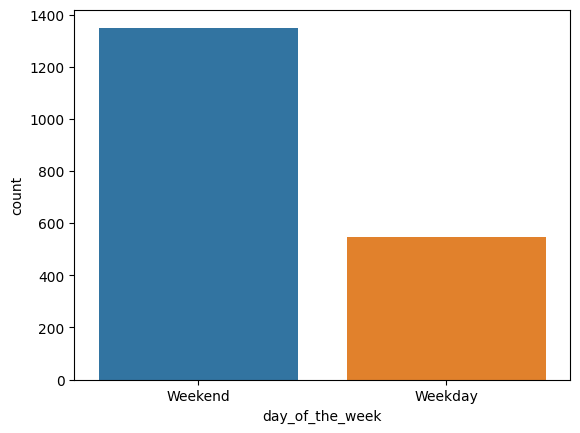

In [ ]:
sns.countplot(data=df,x=df['day_of_the_week'])


Observation: The food-app is mostly used on weekends.

In [ ]:
df['rating'].nunique()

4

<Axes: xlabel='rating', ylabel='count'>

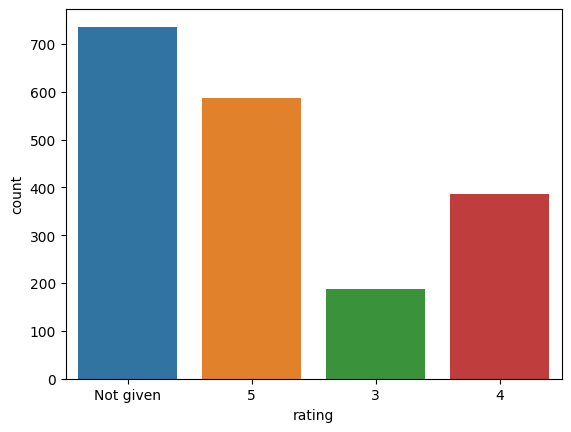

In [ ]:
sns.countplot(data=df, x=df['rating'])

Observation: A large amount of reviews are not rated. Perhaps we can create a system so more users leave a rating as opposed to leaving it blank.

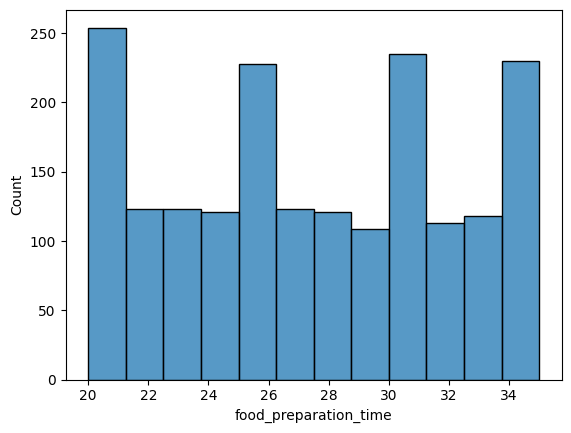

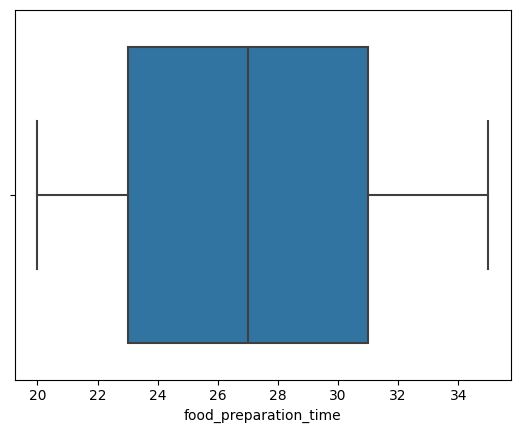

In [ ]:
# Analyzing food_prep_time
sns.histplot(data=df,x=df['food_preparation_time'])
plt.show()
sns.boxplot(data=df,x=df['food_preparation_time'])
plt.show()

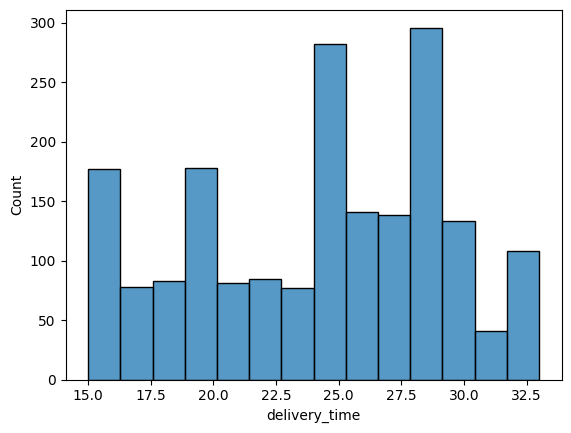

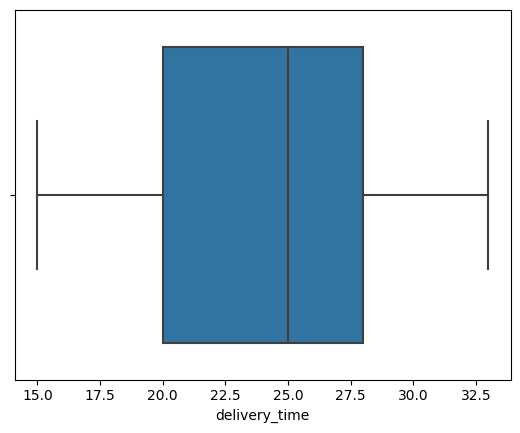

In [ ]:
# Analyzing delivery_time
sns.histplot(data=df,x=df['delivery_time'])
plt.show()
sns.boxplot(data=df,x=df['delivery_time'])
plt.show()

Observation: If we take the mean food_prep_time and delivery_time, it adds to 27 + 25 = 52 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Finding restaurants with the most orders
df['restaurant_name'].value_counts()


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations: The top 5 restaurants in terms of orders received are:

1) Shake Shack
2) The Meatball Shop
3) Blue Ribbon Sushi
4) Blue Ribbon Fried Chicken
5) Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:

# Filter data to Weekend Only
weekend = df[df['day_of_the_week'] == 'Weekend']
# Find the most popular cuisine on the weekend
weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
American cuisine is most popular on the weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Find orders_above_20
order_above_20 = df[df['cost_of_the_order']>20]

print('The number of total orders that cost above 20 dollars is:', order_above_20.shape[0])
#The above line shows that there are 555 rows where order_cost is above 20
percentage = (order_above_20.shape[0]/ df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations: There are 555 rows where the order_cost is above 20 dollars. These orders make up around 29% of all the orders.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Get statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

#Both of these methods produced the same answer!

The mean delivery time for this dataset is 24.16 minutes


#### Observations: The mean order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to

1.   List item
2.   List item

the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Find top 3 customer ids
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top 3 customers have the followings IDs:

Customer 52832 has 13 orders.
Customer 47440 has 10 orders.
Customer 83287 has 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


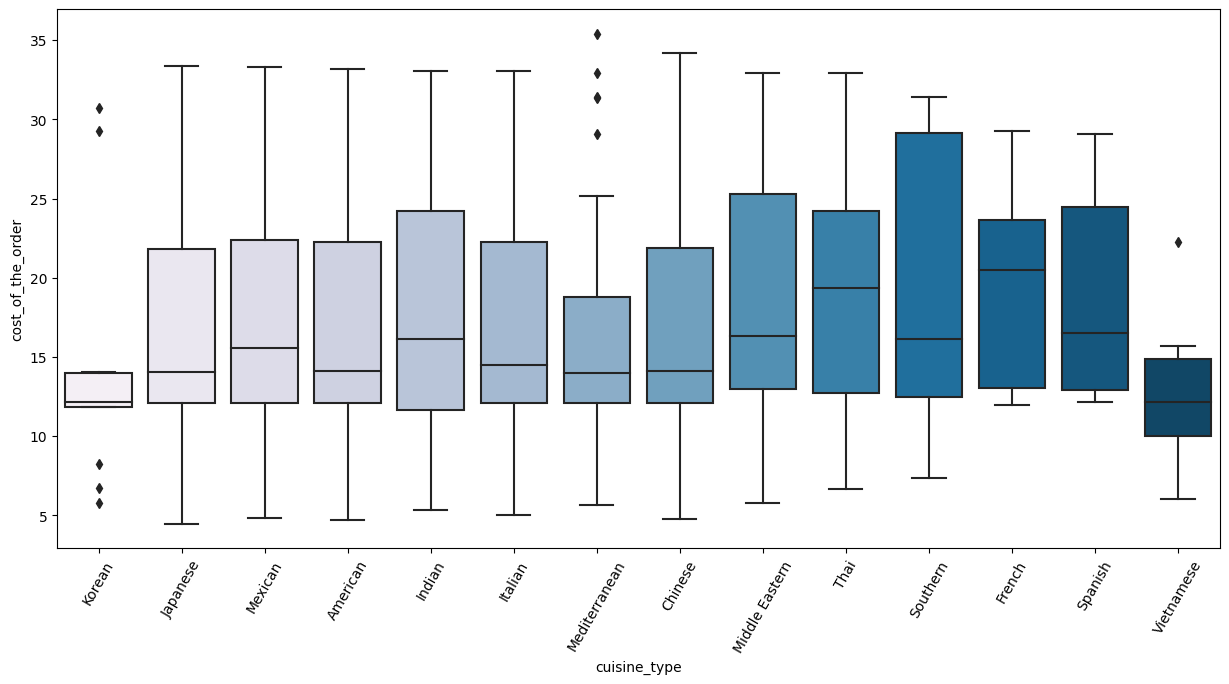

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

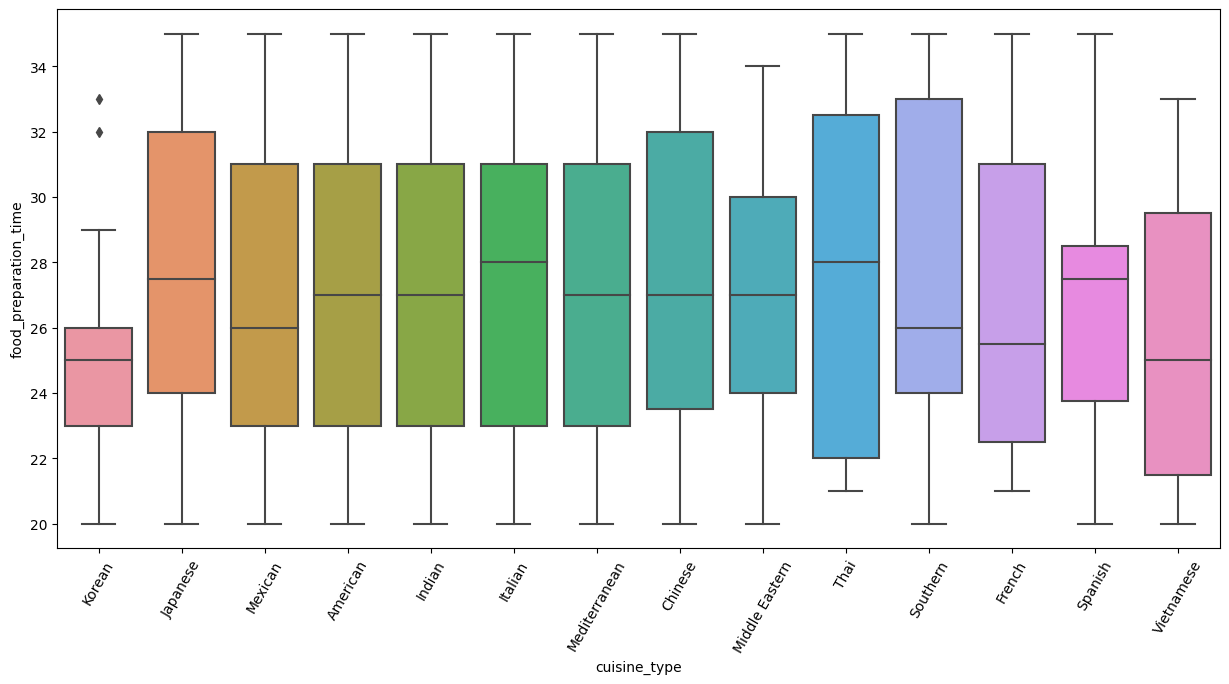

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x ='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation = 60)
plt.show()


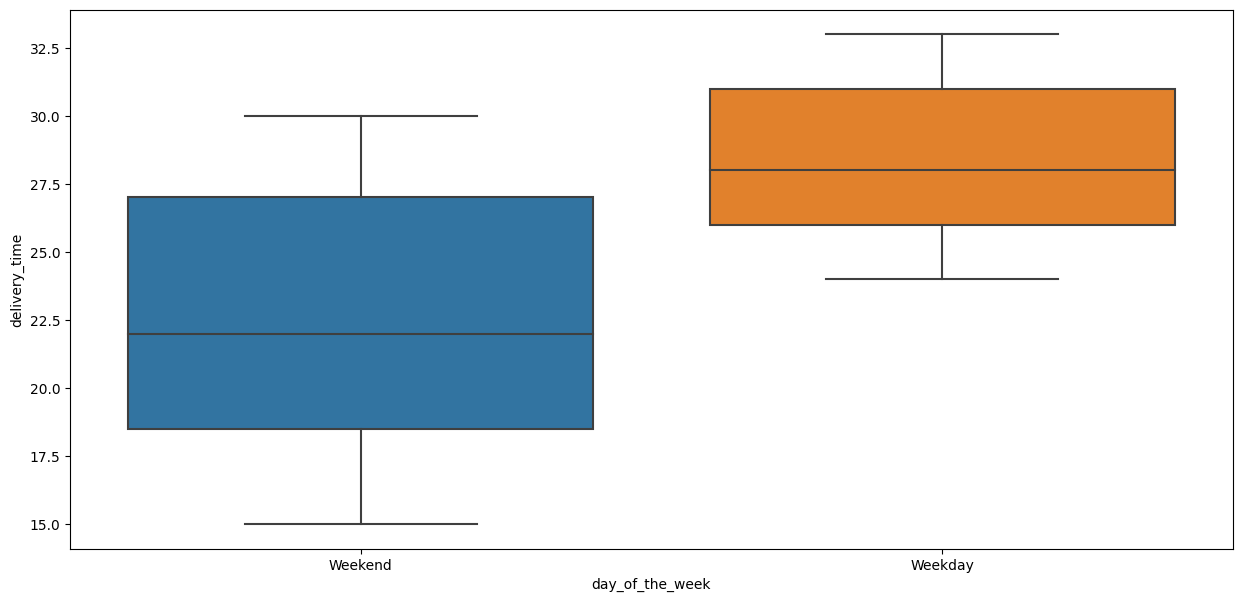

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.show()

Observation: Weekday mean delivery time is higher than weekend mean delivery time. Should we probe into why that is?

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)


restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

Observation: The top 3 restaurants bring in $3579, $2145, and $1903 respectively. But we know from earlier because these top 3 restaurants have more orders than anyone else.

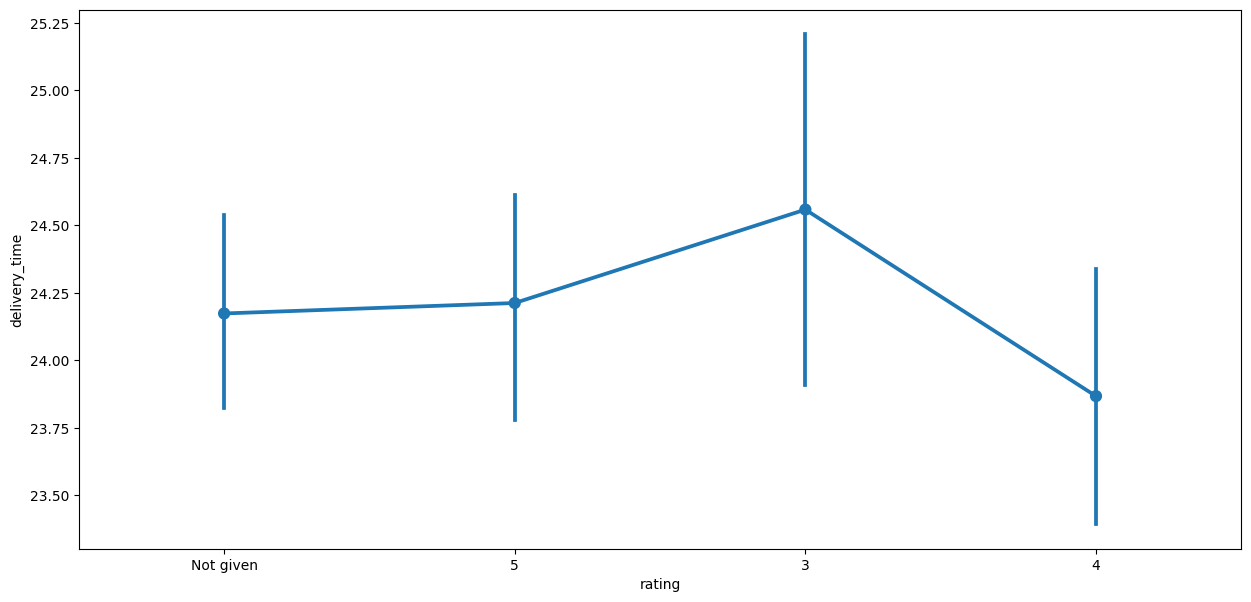

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

Observations: The lowest rating has the biggest confidence interval and has the highest delivery_time. This could be making customers upset.

Interesting, the top rating doesn't have the lowest delivery_time.

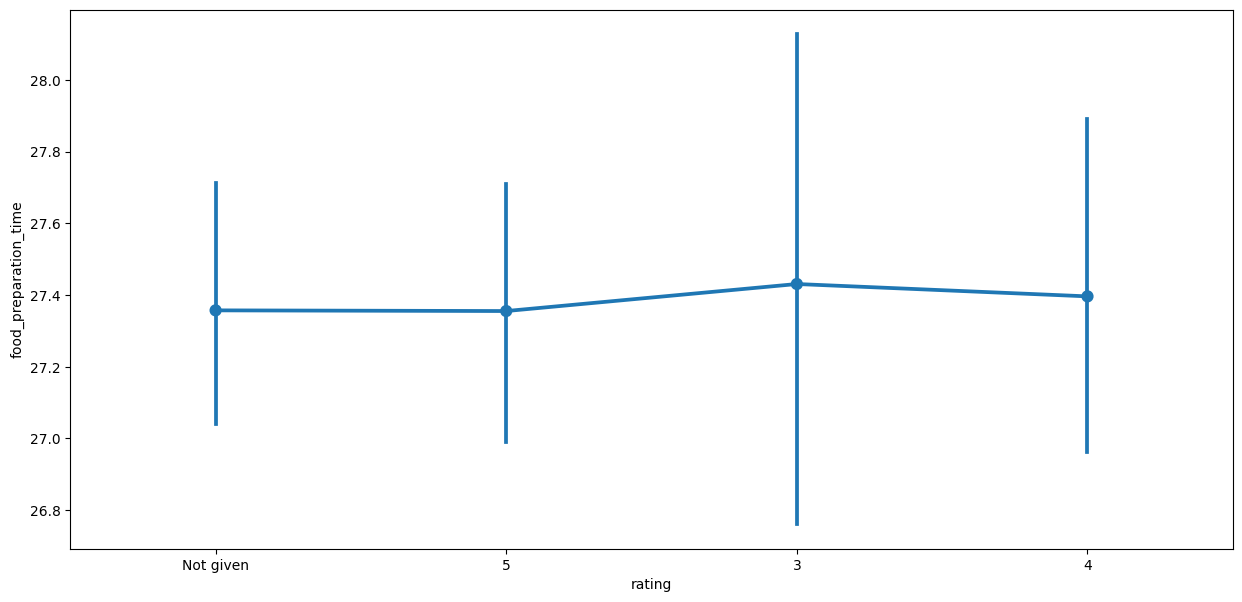

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=df)
plt.show()

Observation: The 'not given' has rougly the same stats as 5-rated restaurants.Is it possible that most of the 'not given' are from 5 star restuarants hence people didn't feel the need to review?

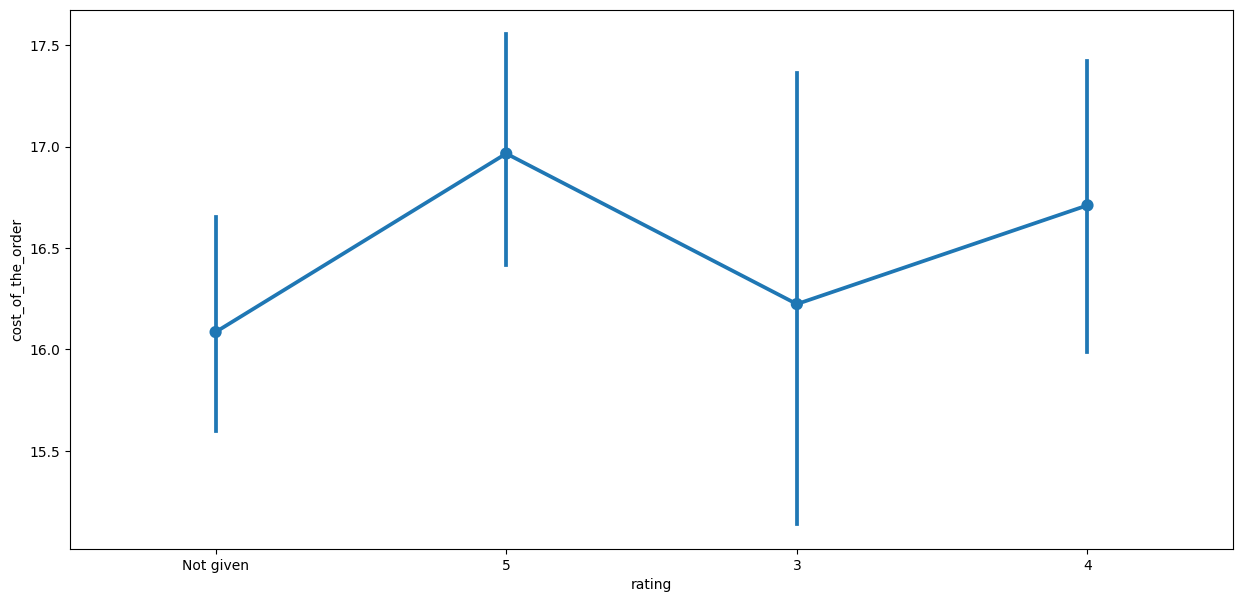

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df)
plt.show()

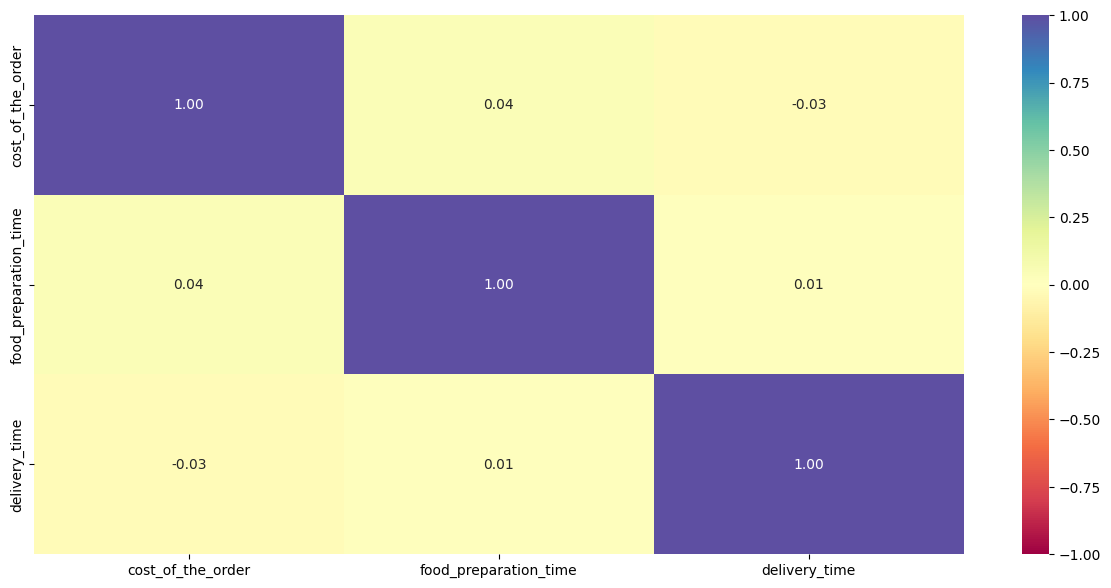

In [ ]:
## Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation: There isn't a strong correlation between any 2 of these variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Lets filter out the Not Rated Restaurants
df_rated = df[ df['rating'] != 'Not given'].copy()

df_rated['rating'] = df_rated['rating'].astype('int')

# Find the top restaurants
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
The restaurants that fulfill the criteria are Shake Shack, The Meatball Shop, Blue Ribbon Fried Chicken, and Blue Ribbon Sushi (not in a specific order).


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Create a revenue function
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() # Computer the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars') #lets print it

The net revenue is around 6166.3 dollars


#### Observations:
The net revenue across all orders is around 6166 dollars. We would need to increase this number if we want a sustainable business model.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Get the total times above 60
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
total_time_above_60 = df[df['total_time']>60]
print('The number of orders that have a total time above 60 minutes is:', total_time_above_60.shape[0] )
above_60_percentage = (total_time_above_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 60 minutes:", round(above_60_percentage, 2), '%')


The number of orders that have a total time above 60 minutes is: 200
Percentage of orders above 60 minutes: 10.54 %


#### Observations:
Around 11% of orders have a waiting time above 60 minutes.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:
The difference between mean delivery time on weekends vs weekdays is 6 minutes. Weekends have a lower delivery time.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Weekends are when the food_app is most used
* Delivery times are shorter on the weekend
* Overall, the company makes ~6k in revenue
* Around 70% of all orders cost less than $20.
* There was no missing data in the dataset.
* Around 40% of orders were 'Not given' a rating.
* The mean total food time was 52 minutes (prep + delivery_time).

### Recommendations:

* In order to boost revenue, I suggest the company increase total number of orders because I believe increasing the app premium per order may result in less users and hamper growth.
* Boost weekend sales. Many people spend extra money on food during the weekend
* Weekday delivery times are relatively long. Is it worth trying to reduce that metric?
* 30% of all orders cost more than 20 dollars. How can we encourage users to spend more than $20 on their order? Can we bring that percentage to 50%?
* Can we devise a system to encourage users to leave more ratings?

---